<h1 style="text-align:center;vertical-align:middle">Oakland Crime数据分析与预处理报告</h1>

## 数据概览

数据给出了2011-2016年OakLand的犯罪情况记录。

In [1]:
import pandas as pd
import numpy as np
import crime_helper

In [2]:
crime_helper.show_col()

Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')

每行数据包括10个列，分别代表：

- **Agency** 机构名称，所有文件除了缺失值，该属性只有唯一值`OP`,资料及讨论区并没有给出具体含义。
- **Create Time** 案件创建时间
- **Location** 案件发生地点
- **Area ID** 案件发生区域代码
- **Beat** 案件发生的巡逻区（Beat为警用术语，用于划分每个警官的巡逻区域，资料来源及地图划分<a href = 'https://www.kaggle.com/syncush/where-not-to-live-in-oakland-eda'>点这里</a>。
- **Priority** 案件优先级，所给所有数据集中，该属性有三个值：
   - **1**  
   Emergency call which requires immediate response and there is reason to believe that an immediate threat to life exists.(人身安全威胁)
   - **2**  
   Emergency call which requires immediate response and there exists an immediate and substantial risk of major property loss or damage.（财产安全威胁）   
   资料来源[点这里](https://www.kaggle.com/syncush/where-not-to-live-in-oakland-eda)
   - **0**  
   该值缺少相应的描述，但是所有数据集中只有"Red Alert Ariplane I"以及"OFFICIER NEEDS IMMEDI"是属于该优先级，估测是优先级高于1和2的优先程度。
- **Incident Type ID** 案件类型ID
- **Incident Type Description** 案件类型
- **Event Number** 案件标号，唯一值
- **Closed Time** 案件结束时间

接下来的内容将对以上属性中的数值属性，有意义的非唯一标称属性，以及可推导获得的有意义的属性进行数据分析与预处理。

### 1 Agency(有缺失值)

In [3]:
helper = crime_helper.col_helper()

In [4]:
helper.grab_col('Agency')
# 缺失值个数
n_b = helper.count_none()

2011 : 1
2012 : 1
2013 : 1
2014 : 0
2015 : 0
2016 : 1


In [5]:
# 查询缺失值所在的行值
index11,row11 = crime_helper.get_row_index(0,'Agency','')
index12,row12 = crime_helper.get_row_index(1,'Agency','')
index13,row13 = crime_helper.get_row_index(2,'Agency','')
index16,row16 = crime_helper.get_row_index(5,'Agency','')
print(row11)
print(row12)
print(row13)
print(row16)

[array(['', '', '   ', '', '', '', '', '', '', ''], dtype=object)]
[array(['', '', '', '', '', '', '', '', '', '', ''], dtype=object)]
[array(['', '', '      ', '', '', '', '', '', '', ''], dtype=object)]
[array(['', '', '      ', '', '', '', '', '', '', ''], dtype=object)]


可以发现有缺失值所在行的属性均为空值，个人判断其应该是数据文件在上传时，人为查看过，不小心在末尾留了一个空行。对于这种缺失值，直接删除即可。

In [6]:
crime_helper.delete_row(0,index11)
crime_helper.delete_row(1,index12)
crime_helper.delete_row(2,index13)
crime_helper.delete_row(5,index16)
helper.grab_col('Agency')
# 填补后缺失值个数
n_a = helper.count_none()

2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 0


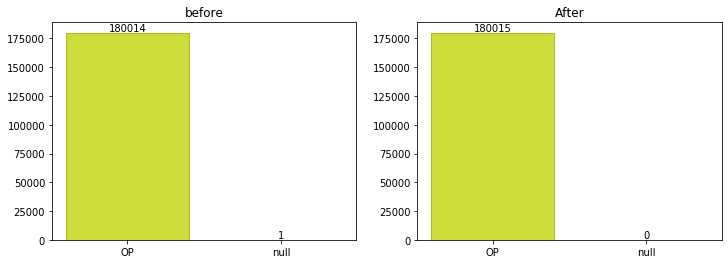

In [7]:
#2011年处理前后对比
helper.normal_bar(0,12,4,n_b[0],n_a[0],['OP','null'])

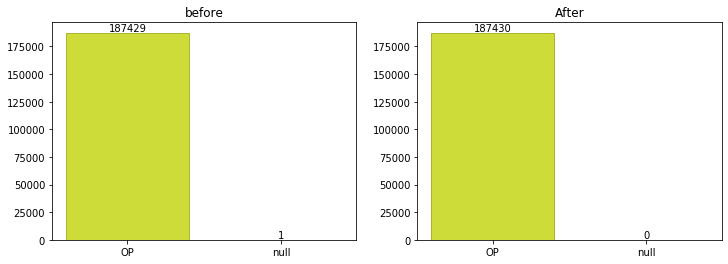

In [8]:
#2012年处理前后对比
helper.normal_bar(1,12,4,n_b[1],n_a[1],['OP','null'])

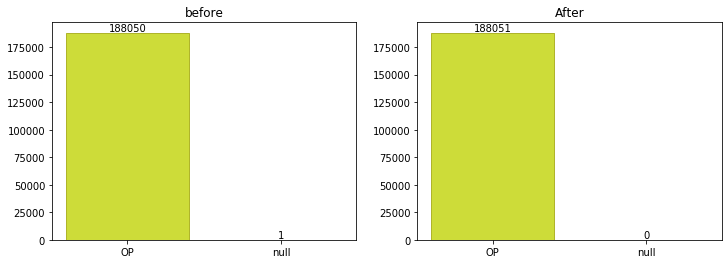

In [9]:
#2013年处理前后对比
helper.normal_bar(2,12,4,n_b[2],n_a[2],['OP','null'])

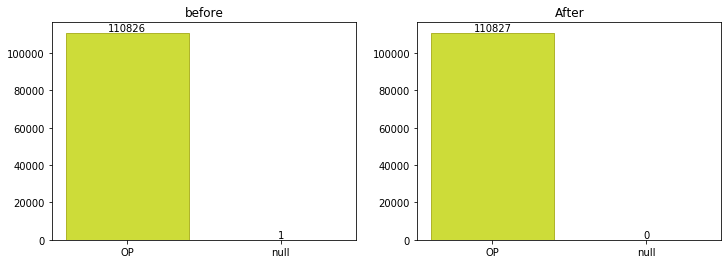

In [10]:
#2016年处理前后对比
helper.normal_bar(5,12,4,n_b[5],n_a[5],['OP','null'])

### 2 案件处理时间(有缺失值)

该值为用Closed Time - Create Time推导出的数值属性

In [11]:
helper.grab_col('Closed Time')

In [12]:
helper.count_none('')

2011 : 6
2012 : 18
2013 : 1
2014 : 0
2015 : 0
2016 : 0


[6, 18, 1, 0, 0, 0]

In [13]:
crime_helper.get_row_index(0, 'Closed Time', '')

([153870, 153890, 153903, 153906, 153908, 153911],
 [array(['OP', '2011-11-05T23:50:42.000', '47TH EMBARCADERO WEST ', '1',
         '01X', 2, '415', 'DISTURBANCE-DRINKERS', 'LOP111105000928', ''],
        dtype=object),
  array(['OP', '2011-11-06T00:51:23.000', '47TH OAK GROVE AV', '1', '12Y',
         2, 'SECCK', 'SECURITY CHECK', 'LOP111106000032', ''], dtype=object),
  array(['OP', '2011-11-06T01:23:47.000', '47TH AV&SANFORD ST ', '2', '35Y',
         1, '949', 'SUSPICIOUS VEHICLE', 'LOP111106000048', ''],
        dtype=object),
  array(['OP', '2011-11-06T01:34:32.000', '47TH GRAND AV ', '1', '14Y', 1,
         '242', 'BATTERY', 'LOP111106000050', ''], dtype=object),
  array(['OP', '2011-11-06T01:36:53.000', '47TH ST&WOOD ST ', '1', '02Y', 1,
         '5150', 'MENTALLY ILL', 'LOP111106000052', ''], dtype=object),
  array(['OP', '2011-11-06T01:56:45.000', '47TH ST&BROADWAY  ', '1', '08X',
         2, 'SECCK', 'SECURITY CHECK', 'LOP111106000056', ''], dtype=object)])

可以发现，在2011以及2012年的数据中Closed Time是有缺失值的，判断原因应该是为结案/忘记录入结束时间,在处理缺失值之前，先暂时将这些值剔除。

In [14]:
# 推导案件处理时间time = Close Time - Create Time
import datetime
def str_to_datetime(s):
    date,time = s.split('T')
    date = date.split('-')
    time = time[:-4].split(':')
    date = [int(x) for x in date]
    time = [int(x) for x in time]
    return datetime.datetime(date[0],date[1],date[2],time[0],time[1],time[2])
def time_interval(col1,col2):
    start = col1.values;
    end = col2.values;
    ans = []
    for s,e in zip(start,end):
        if e == '':
            continue
        else:
            ans.append(int((str_to_datetime(e)-str_to_datetime(s)).seconds/60))
    return ans

In [15]:
helper.generate_new_col('Create Time','Closed Time',time_interval)

**数据摘要**

In [16]:
# 五数概括
helper.five_number()

Year 2011
Min: 0,Q1: 20.0,Q2: 56.0,Q3: 128.0,Max: 1439
Year 2012
Min: 0,Q1: 23.0,Q2: 64.0,Q3: 148.0,Max: 1439
Year 2013
Min: 0,Q1: 25.0,Q2: 72.0,Q3: 169.0,Max: 1439
Year 2014
Min: 0,Q1: 24.0,Q2: 71.0,Q3: 172.0,Max: 1439
Year 2015
Min: 0,Q1: 21.0,Q2: 66.0,Q3: 161.0,Max: 1439
Year 2016
Min: 0,Q1: 22.0,Q2: 70.0,Q3: 173.0,Max: 1439


**数据分布**

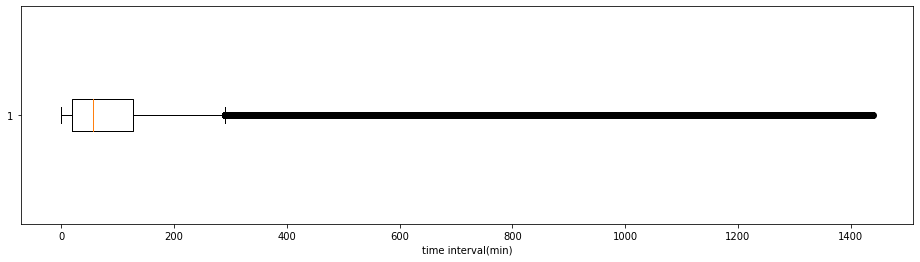

290.0


In [17]:
# 盒图
# 2011年
helper.box(0,16,4,'time interval(min)')

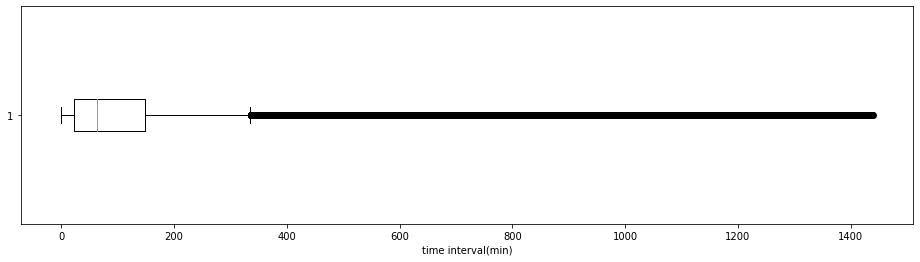

335.5


In [18]:
# 2012年
helper.box(1,16,4,'time interval(min)')

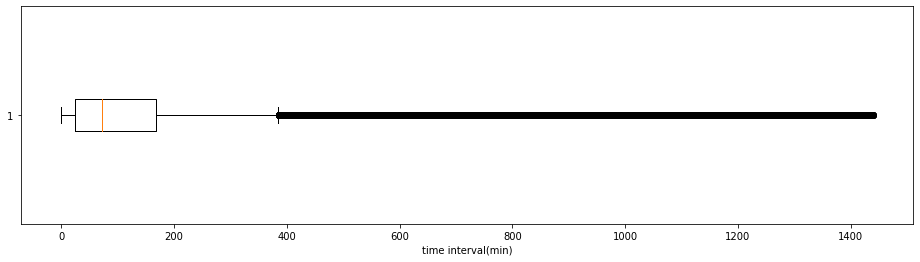

385.0


In [19]:
# 2013年
helper.box(2,16,4,'time interval(min)')

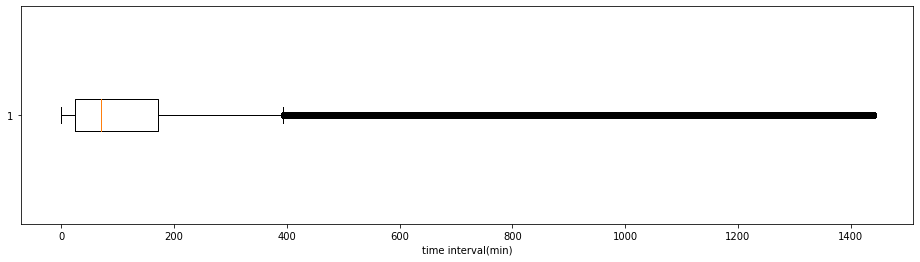

394.0


In [20]:
# 2014年
helper.box(3,16,4,'time interval(min)')

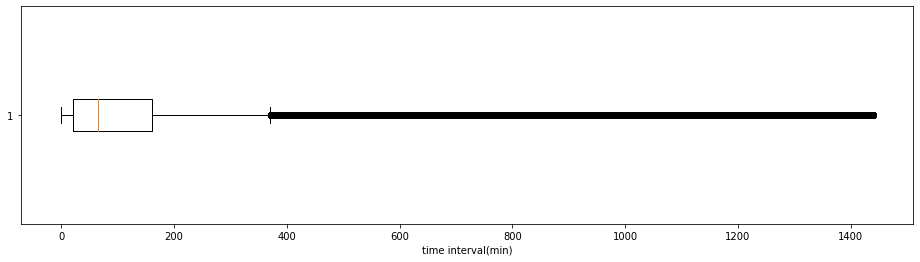

371.0


In [21]:
# 2015年
helper.box(4,16,4,'time interval(min)')

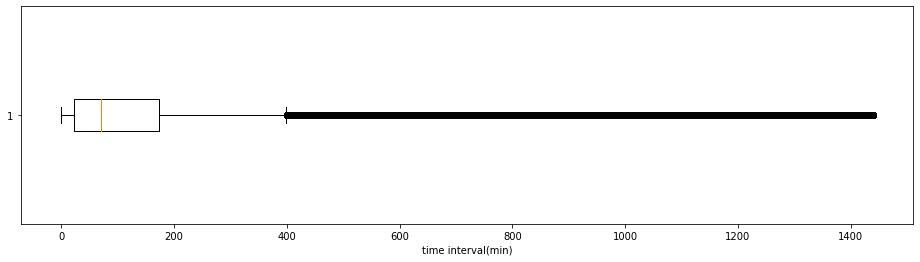

399.5


In [22]:
# 2016年
helper.box(5,16,4,'time interval(min)')

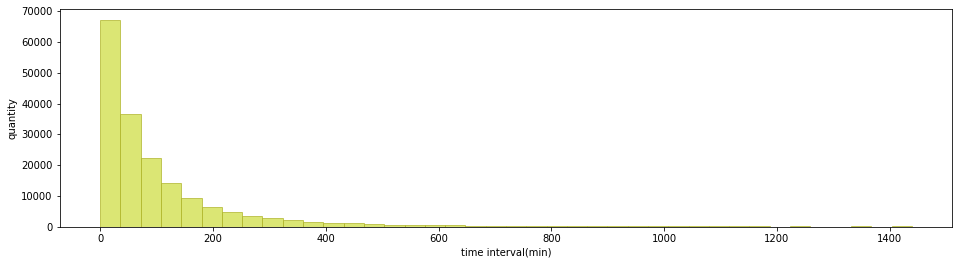

In [23]:
# 直方图
# 2011年
helper.normal_hist(0,16,4,'time interval(min)','quantity')

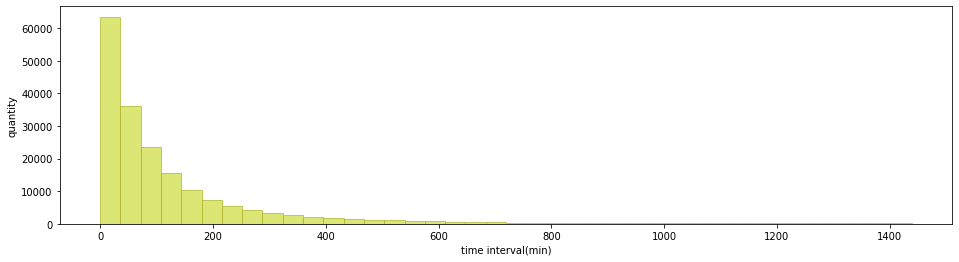

In [24]:
# 2012年
helper.normal_hist(1,16,4,'time interval(min)','quantity')

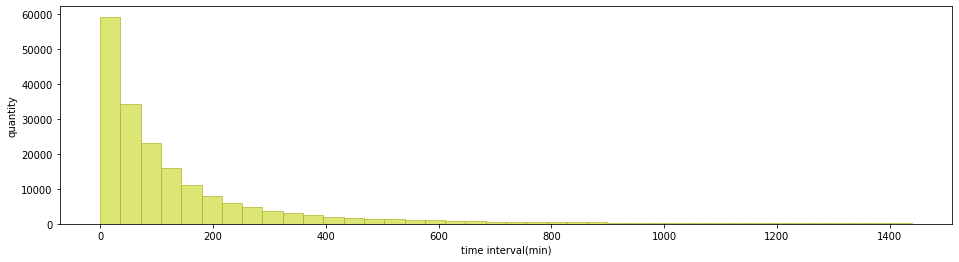

In [25]:
# 2013年
helper.normal_hist(2,16,4,'time interval(min)','quantity')

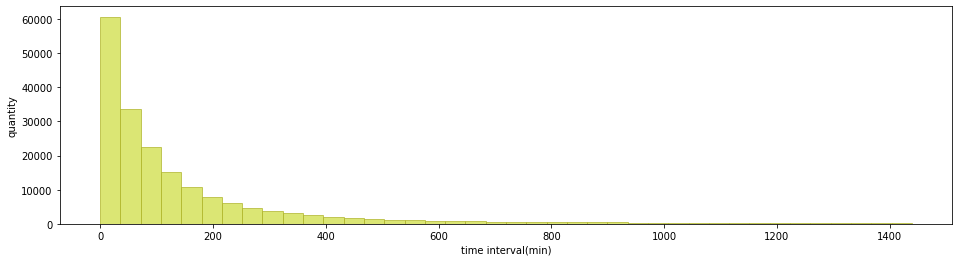

In [26]:
# 2014年
helper.normal_hist(3,16,4,'time interval(min)','quantity')

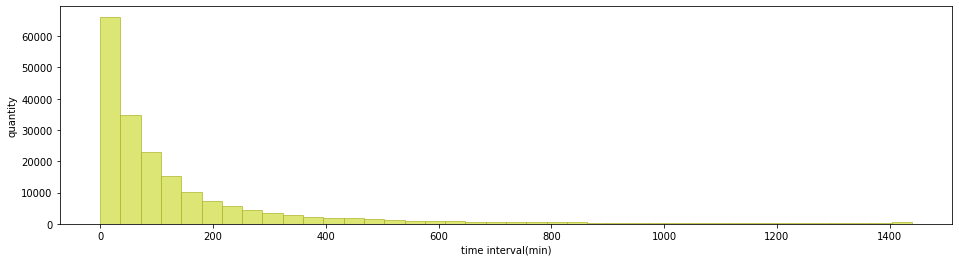

In [27]:
# 2015年
helper.normal_hist(4,16,4,'time interval(min)','quantity')

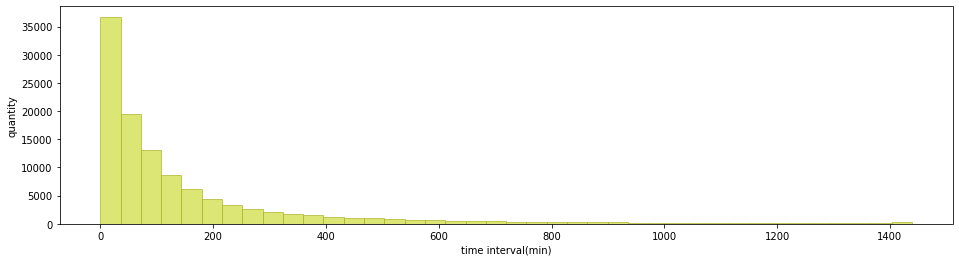

In [28]:
# 2016年
helper.normal_hist(5,16,4,'time interval(min)','quantity')

从2011-2015年的盒图和直方图可以看出，大多数的案件都能很快的解决，少数案件处理花费的时间长。从盒图得出，2011年，案件解决时间超过290分钟的点为离群点；2012年，案件解决时间超过335分钟的点为离群点；2013年，案件解决时间超过385分钟的点为离群点；2014年，案件解决时间超过394分钟的点为离群点；2015年，案件解决时间超过371分钟的点为离群点；2013年，案件解决时间超过399分钟的点为离群点。总的趋势是案件解决时间逐年上升。

**缺失值处理**

针对缺失项，可以进行以下几种处理：

- 删除缺失项
  
上述分析即建立在剔除缺失项的基础上

- 选择最高频率的值代替缺失值

- 利用数据对象的相似性

In [29]:
# 2011
pd.value_counts(helper.data[0])

0       9739
1       5208
2       3334
3       2599
4       1928
        ... 
1147       1
1275       1
1195       1
1066       1
1407       1
Length: 1405, dtype: int64

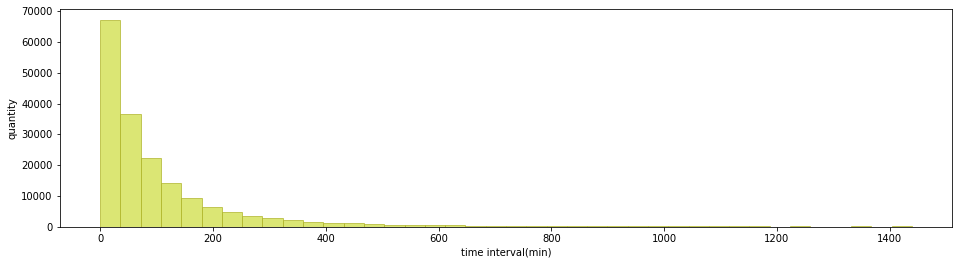

In [30]:
# 用最高频率的值填补缺失值
helper.data[0] = helper.data[0] + 6 * [0]
# 处理后的频数分布
helper.normal_hist(0,16,4,'time interval(min)','quantity')

In [31]:
# 利用数据对象的相似性
crime_helper.get_row_index(0, 'Closed Time', '')

([153870, 153890, 153903, 153906, 153908, 153911],
 [array(['OP', '2011-11-05T23:50:42.000', '47TH EMBARCADERO WEST ', '1',
         '01X', 2, '415', 'DISTURBANCE-DRINKERS', 'LOP111105000928', ''],
        dtype=object),
  array(['OP', '2011-11-06T00:51:23.000', '47TH OAK GROVE AV', '1', '12Y',
         2, 'SECCK', 'SECURITY CHECK', 'LOP111106000032', ''], dtype=object),
  array(['OP', '2011-11-06T01:23:47.000', '47TH AV&SANFORD ST ', '2', '35Y',
         1, '949', 'SUSPICIOUS VEHICLE', 'LOP111106000048', ''],
        dtype=object),
  array(['OP', '2011-11-06T01:34:32.000', '47TH GRAND AV ', '1', '14Y', 1,
         '242', 'BATTERY', 'LOP111106000050', ''], dtype=object),
  array(['OP', '2011-11-06T01:36:53.000', '47TH ST&WOOD ST ', '1', '02Y', 1,
         '5150', 'MENTALLY ILL', 'LOP111106000052', ''], dtype=object),
  array(['OP', '2011-11-06T01:56:45.000', '47TH ST&BROADWAY  ', '1', '08X',
         2, 'SECCK', 'SECURITY CHECK', 'LOP111106000056', ''], dtype=object)])

以2011年的数据为例，首先查找出缺失对象的案件类型，分别为DISTURBANCE-DRINKERS，SECURITY CHECK，SUSPICIOUS VEHICLE，BATTERY，MENTALLY ILL，SECURITY CHECK。
然后分别统计这些事件类型的案件处理时间，分别求得该类型下案件的平均处理时间，用该时间分别填补对应类型的缺失项值。

In [32]:
# 按类型计算其它数据对象的案件处理时间均值
def get_type_mean(file_index,col,value):
    index,lst=crime_helper.get_row_index(file_index, col,value)
    sum = 0
    cnt = 0
    for i in lst:
        if i[9] != '':
            sum += int((str_to_datetime(i[9])-str_to_datetime(i[1])).seconds/60)
            cnt += 1
    return int(sum/cnt)

In [33]:
get_type_mean(0,'Incident Type Description','DISTURBANCE-DRINKERS')

108

In [34]:
helper.generate_new_col('Create Time','Closed Time',time_interval)

In [35]:
helper.data[0].append(108)

In [36]:
get_type_mean(0,'Incident Type Description','SECURITY CHECK')

62

In [37]:
helper.data[0].append(62)

In [38]:
get_type_mean(0,'Incident Type Description','SUSPICIOUS VEHICLE')

98

In [39]:
helper.data[0].append(98)

In [40]:
get_type_mean(0,'Incident Type Description','BATTERY')

99

In [41]:
helper.data[0].append(99)

In [42]:
get_type_mean(0,'Incident Type Description','MENTALLY ILL')

103

In [43]:
helper.data[0].append(103)

In [44]:
get_type_mean(0,'Incident Type Description','SECURITY CHECK')

62

In [45]:
helper.data[0].append(62)

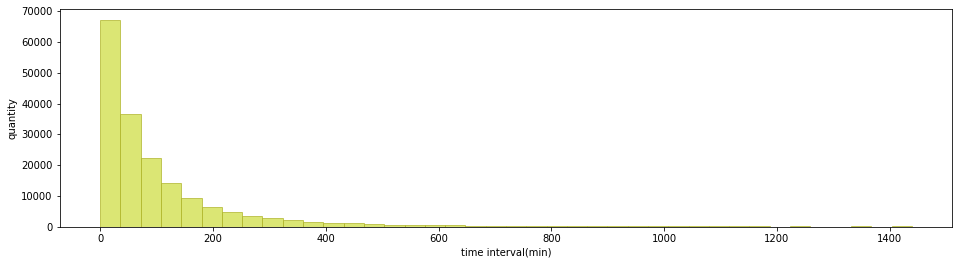

In [46]:
# 处理后案件处理时间的频数分布图
helper.normal_hist(0,16,4,'time interval(min)','quantity')

### 3 案件发生地点Location(有缺失值)
Location/Area/Beat都是地点信息，故该报告仅对粒度最小的Location进行处理。

**频数统计**

In [47]:
# 由于2012与2014的Location数据格式与其它文件不统一，要先对其进行处理
import re
def reformat_file(index):
    data = crime_helper.load_data(crime_helper.root,crime_helper.file_lst[index])
    ans = []
    p = r'^.*address": "(.*)", "city"'
    for i in data['Location 1']:
        if i == '':
            ans.append('')
        else:
            ans.append(re.findall(p,i)[0])
    data = data.drop('Location 1',axis=1)
    data['Location'] = ans
    data.to_csv(crime_helper.root + '/' + crime_helper.file_lst[index],index = False)

In [48]:
reformat_file(1)

In [49]:
reformat_file(3)

In [50]:
def rename_col(index,col,new_col):
    data = crime_helper.load_data(crime_helper.root,crime_helper.file_lst[index])
    data.rename(columns={col:new_col},inplace=True)
    data.to_csv(crime_helper.root + '/' + crime_helper.file_lst[index],index = False)

In [51]:
rename_col(2,'Location ','Location')

In [52]:
helper.grab_col('Location')

In [53]:
# 2011
helper.data[0].value_counts()

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
RANSOM 53RD ST                1
69TH AV&TRASK ST              1
 38TH ST&LA CRESTA            1
LOMA 55TH AV                  1
14TH E 28TH ST                1
Name: Location, Length: 32505, dtype: int64

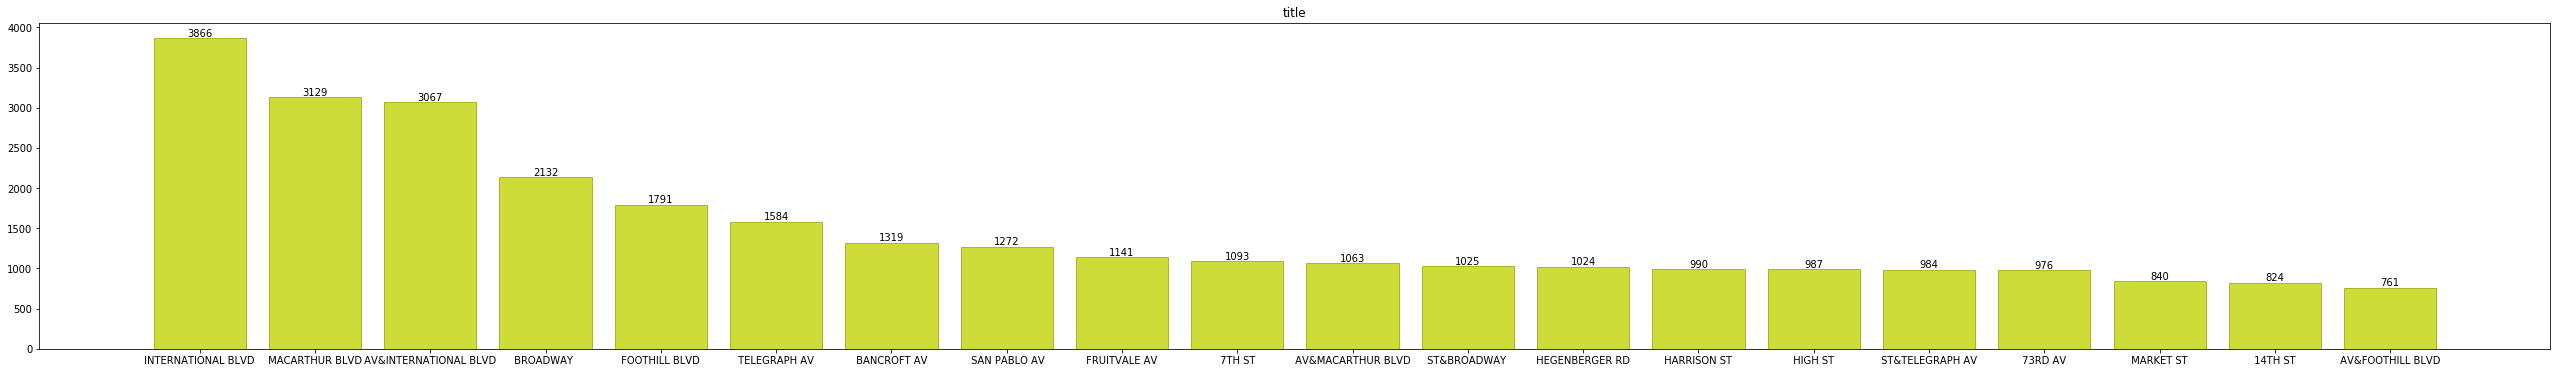

In [55]:
helper.hist_bar(0,45,6,'2011',20)

频数统计可以看出OakLand在2011年，案件发生最多的地方在INTERNATIONAL BLVD、 MACARTHUR BLVD、AV&INTERNATIONAL BLVD、AV&INTERNATIONAL BLVD这些繁华地段，案件发生最多为3866件，在INTERNATIONAL BLVD。(因地点太多图中只列出了前20个案发频率最高的地点)。

In [56]:
# 2012
helper.data[1].value_counts()

INTERNATIONAL BLVD                    3658
MACARTHUR BLVD                        3335
AV&INTERNATIONAL BLVD                 3193
BROADWAY                              2167
FOOTHILL BLVD                         1649
                                      ... 
MAXWELL MACARTHUR BLVD&PIEDMONT AV       1
105TH RD&COLLEGE AV                      1
14TH AV&LOCKWOOD ST                      1
W E 31ST ST                              1
18TH EVERETT AV                          1
Name: Location, Length: 35313, dtype: int64

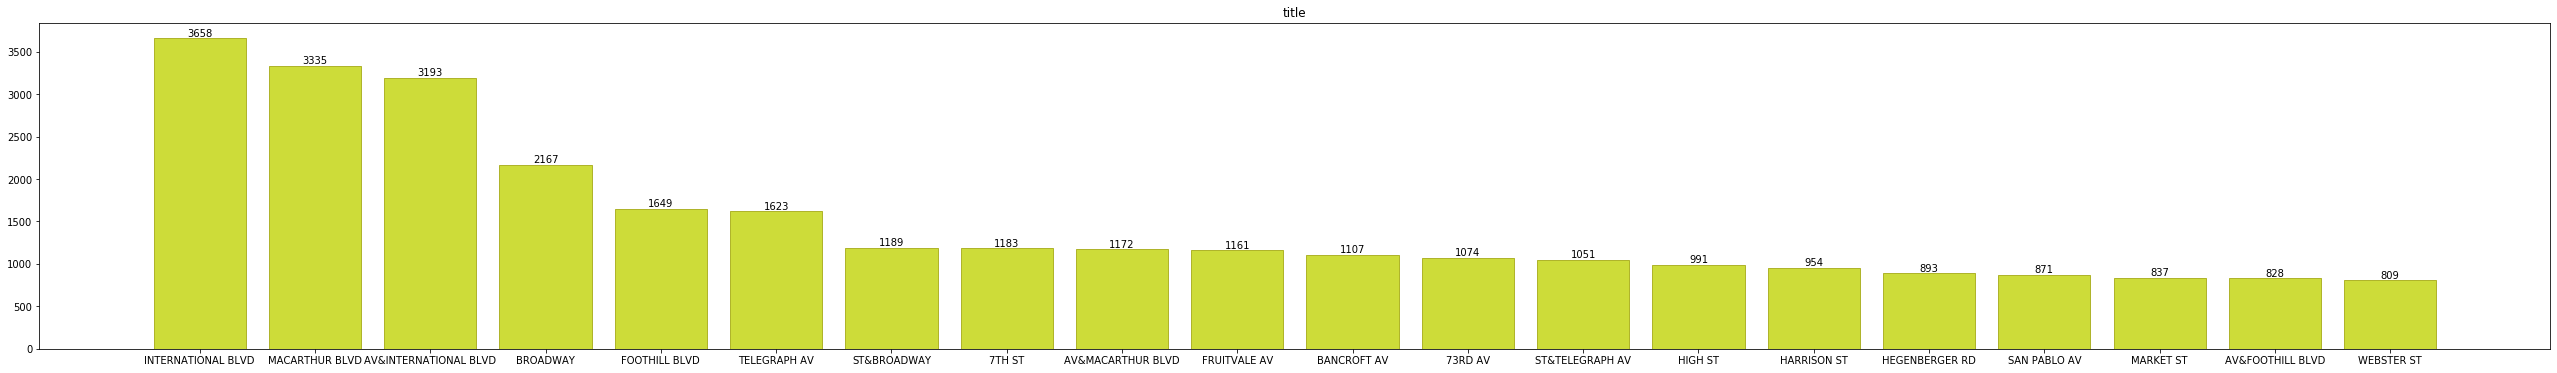

In [57]:
helper.hist_bar(1,45,6,'2012',20)

In [58]:
# 2013
helper.data[2].value_counts()

 INTERNATIONAL BLVD           3647
 AV&INTERNATIONAL BLVD        3405
 MACARTHUR BLVD               3002
 BROADWAY                     2036
 FOOTHILL BLVD                1650
                              ... 
E BOND ST                        1
38TH AV&GLASCOCK ST              1
22ND 45TH ST                     1
2ND WEST ST                      1
LAKE 14TH AV                     1
Name: Location, Length: 36804, dtype: int64

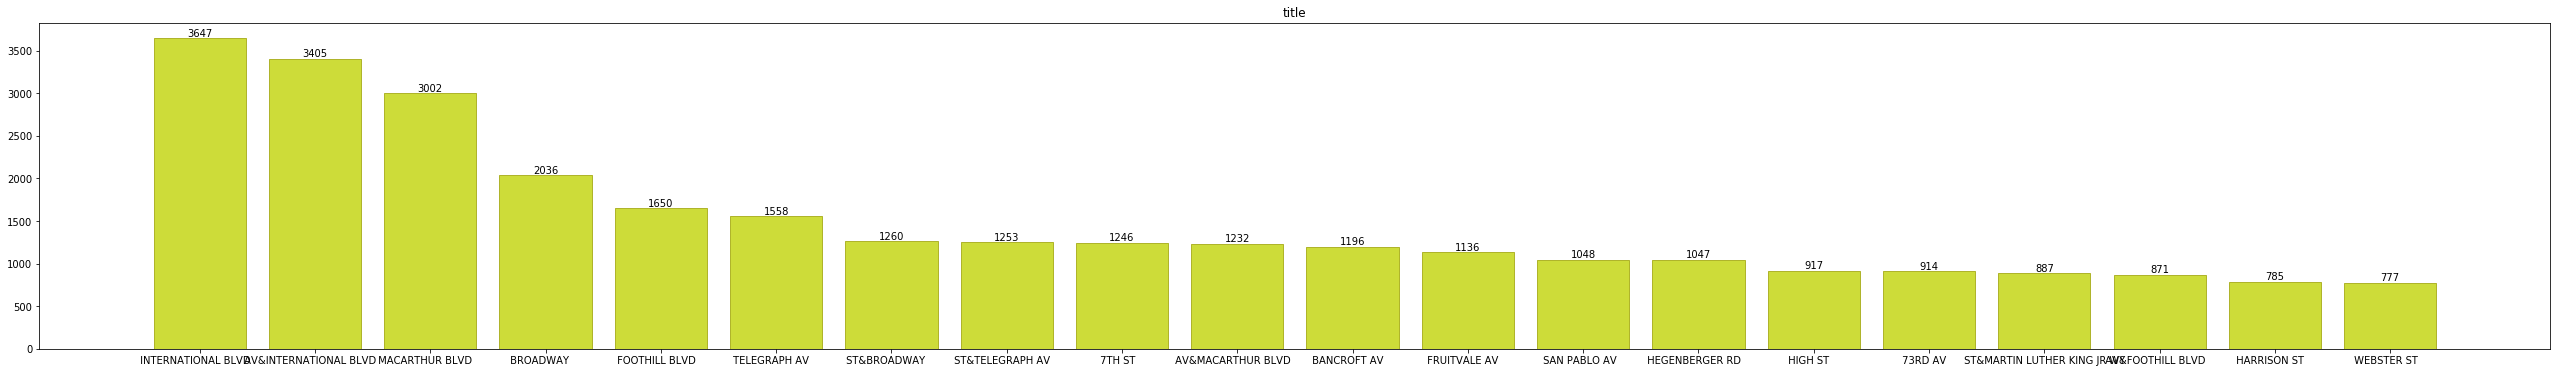

In [59]:
helper.hist_bar(2,45,6,'2013',20)

In [60]:
# 2014
helper.data[3].value_counts()

INTERNATIONAL BLVD        3713
AV&INTERNATIONAL BLVD     3290
MACARTHUR BLVD            2812
BROADWAY                  1996
FOOTHILL BLVD             1774
                          ... 
24TH PARK BLVD               1
18TH 17TH AV                 1
EDGEWATER BROOKDALE AV       1
NEY 34TH ST                  1
GEORGIA HAYES ST             1
Name: Location, Length: 35132, dtype: int64

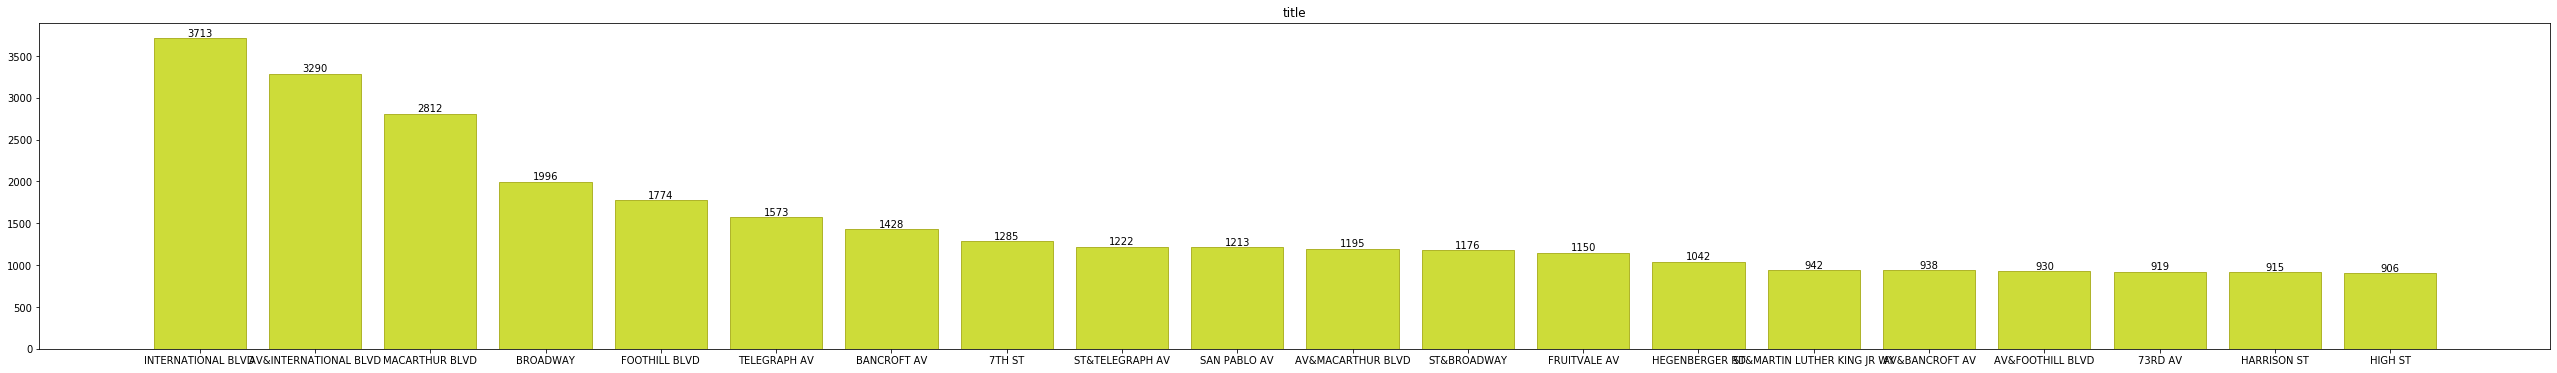

In [61]:
helper.hist_bar(3,45,6,'2014',20)

In [62]:
# 2015
helper.data[4].value_counts()

 INTERNATIONAL BLVD           3695
 AV&INTERNATIONAL BLVD        3106
 MACARTHUR BLVD               3105
 BROADWAY                     2407
 FOOTHILL BLVD                1753
                              ... 
FOOTHILL MURDOCK CT              1
 AND INTERNAIONAL                1
88TH FAIRMONT DR                 1
2ND MERA ST                      1
BEACON 14TH ST                   1
Name: Location, Length: 36515, dtype: int64

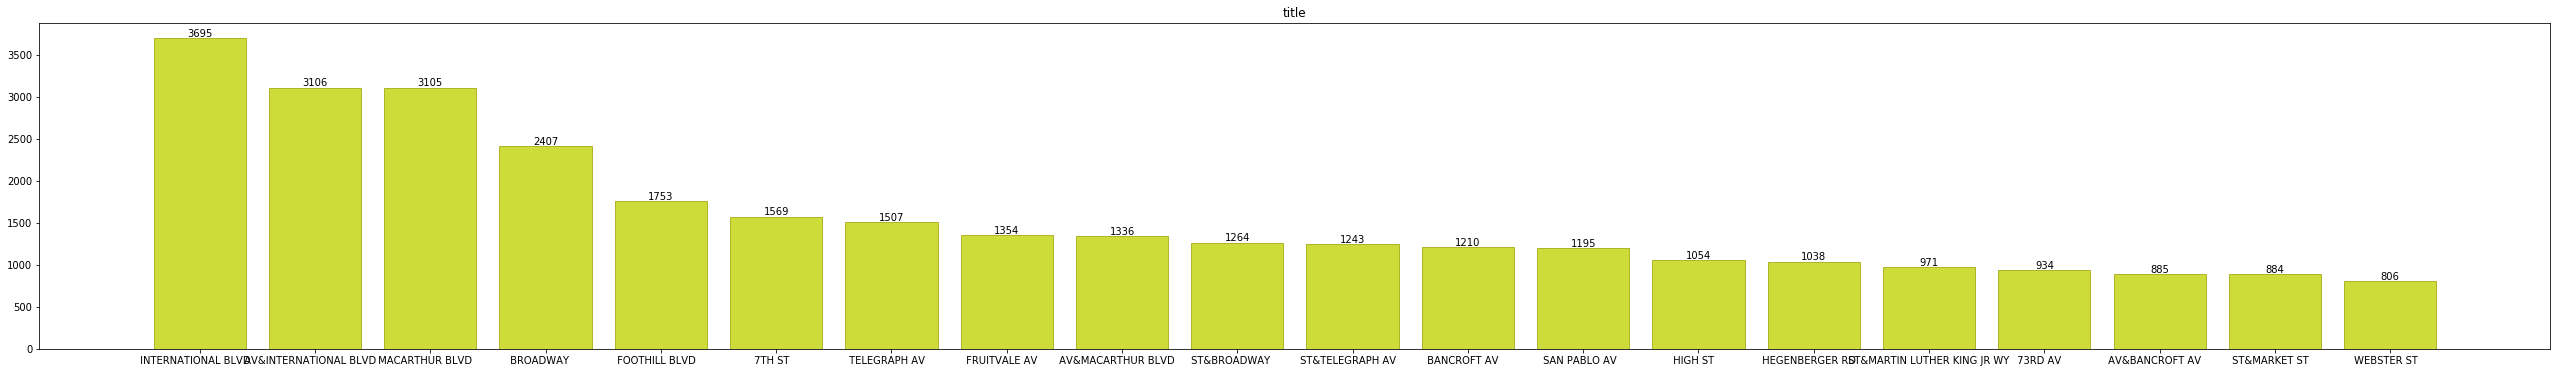

In [63]:
helper.hist_bar(4,45,6,'2015',20)

In [64]:
# 2016
helper.data[5].value_counts()

 INTERNATIONAL BLVD           2156
 AV&INTERNATIONAL BLVD        1829
 MACARTHUR BLVD               1813
 BROADWAY                     1472
 7TH ST                       1223
                              ... 
CHABOT DEERING CT                1
GRAND BEAUMONT AV                1
KELLER 106TH AV                  1
101ST 59TH ST                    1
25TH AV&COLISEUM WY              1
Name: Location, Length: 24046, dtype: int64

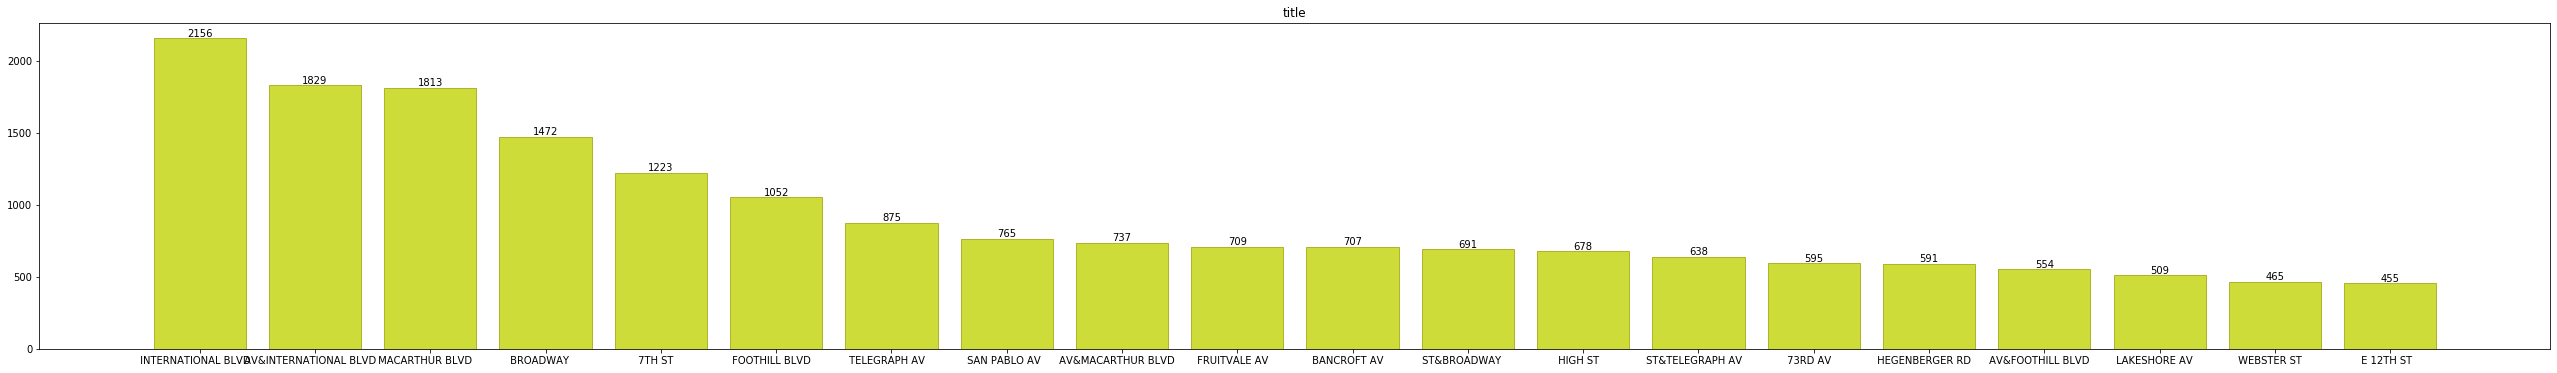

In [65]:
helper.hist_bar(5,45,6,'2016',20)

其它年份的频数统计在案情多发地点上也基本一致，可以发现2016年高频案发地点的的案件发生数量有明显下降，推测相关的确应该加强了管理。

**缺失值处理**

In [66]:
n_b = helper.count_none()

2011 : 0
2012 : 69
2013 : 0
2014 : 42
2015 : 0
2016 : 0


2012，2014年的数据存在缺失值，推测原因是在数据记录时出错，因为2012、2014年的Location数据本身就是未处理的状态，因此可以推测是数据收集以及整理过程中就已经出现了问题。这里可以进行缺失值的处理方式有以下几种：

- 删除所有缺失数据
  
  因为缺失值个数和不是很多，直接删除应该影响并不能对后续的数据分析造成不可逆的影响。
  
- 将缺失数据用频率最高的值代替
  
  2012、2014年案发数量最高的地点都是INTERNATIONAL BLVD，可用该地点进行填充。
  
- 利用数据对象的相关性进行填补
  
  根据事件类型Incident Type Description,筛选出和缺失项相同类型事件的地域分布，选择频率高的数据项所对应的地区进行填补。

- 利用属性的相关性进行填补
  
  和Location相关的属性有Area ID(区域)，Beat(巡逻区域)，根据相关资料可以知道，对于范围，Area > Beat >Location。观察缺失值的数据项，缺失Location的必然缺失Beat，因此不能够利用Beat来填补Location，但是Area填补的话，无法精确到Location，有些数据项也同时缺失Area项。
  
  综上所述，这里使用一种结合这几种方法的策略：对于同时缺失Area和Location的数据项，直接删除，对于只缺失Location，但存在Area值的，计算对应Area里案发频率最大的地点，进行填补。

In [67]:
# 2012年
index_lst,items = crime_helper.get_row_index(1, 'Location', '')

In [68]:
def get_delete_index(items):
    for i in range(len(items)):
        if items[i][2] == '' and items[i][-1] == '':
            delete_lst.append(i)

In [69]:
# 删除Area和Location都缺失的项
delete_lst = []
get_delete_index(items)
delete_lst.reverse()
crime_helper.delete_row(1, [index_lst[x] for x in delete_lst])
for i in delete_lst:
    items.pop(i)
len(items)

61

In [70]:
for i in delete_lst:
    index_lst.pop(i)

In [71]:
# 统计不同Area对应的最大频率值
items = np.array(items)
area = items[:,2]
pd.value_counts(area)

1    34
2    27
dtype: int64

In [72]:
def get_max_area_location(index,area_id):
    data = crime_helper.load_data(crime_helper.root,crime_helper.file_lst[index])
    data = data[data['Area Id'] == area_id]
    return data['Location'].value_counts().index[0]
L1 = get_max_area_location(1,'1')
L2 = get_max_area_location(1,'2')
L1 = pd.DataFrame(34 * [L1])
L2 = pd.DataFrame(27 * [L2])

In [73]:
helper.grab_col('Location')

In [74]:
helper.data[0] = helper.data[0][helper.data[0] != '']
helper.data[0] = helper.data[0].append(L1,ignore_index=True)
helper.data[0] = helper.data[0].append(L2,ignore_index=True)
helper.data[0] = helper.data[0][0]
helper.data[0].value_counts()

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
ALHAMBRA 73RD AV              1
RANSOM 53RD ST                1
69TH AV&TRASK ST              1
 38TH ST&LA CRESTA            1
14TH E 28TH ST                1
Name: 0, Length: 32507, dtype: int64

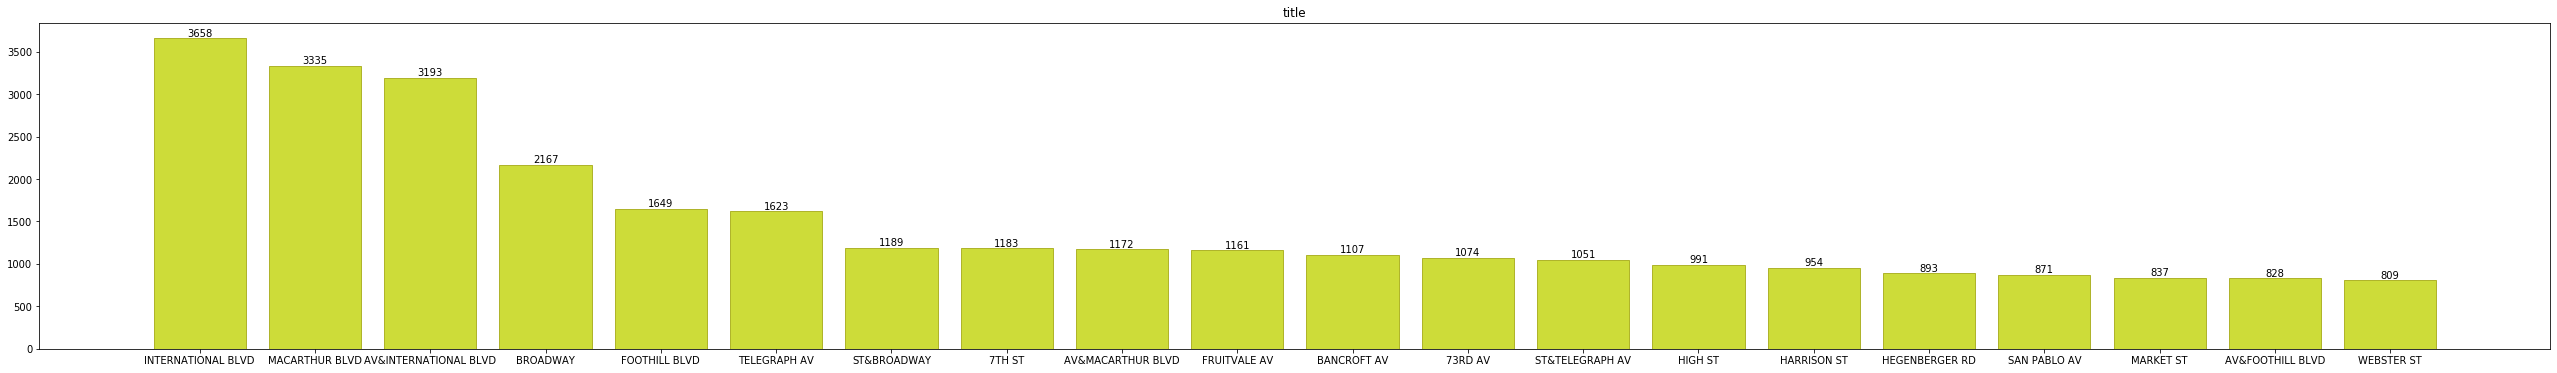

In [75]:
# 填充后的直方图 可以与上一小节的2012年的图对比
helper.hist_bar(1,45,6,'2012',20)

In [76]:
# 2014
index_lst,items = crime_helper.get_row_index(3, 'Location', '')

In [77]:
delete_lst = []
get_delete_index(items)
delete_lst.reverse()
crime_helper.delete_row(3, [index_lst[x] for x in delete_lst])
for i in delete_lst:
    items.pop(i)
len(items)

3

In [78]:
items = np.array(items)
area = items[:,2]
pd.value_counts(area)

2    3
dtype: int64

In [79]:
L2 = get_max_area_location(3,'2')
L2 = pd.DataFrame(3 * [L2])

In [80]:
helper.grab_col('Location')

In [81]:
helper.data[3] = helper.data[3][helper.data[3] != '']
helper.data[3] = helper.data[3].append(L2,ignore_index=True)
helper.data[3] = helper.data[3][0]
helper.data[0].value_counts()

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
RANSOM 53RD ST                1
69TH AV&TRASK ST              1
 38TH ST&LA CRESTA            1
LOMA 55TH AV                  1
14TH E 28TH ST                1
Name: Location, Length: 32505, dtype: int64

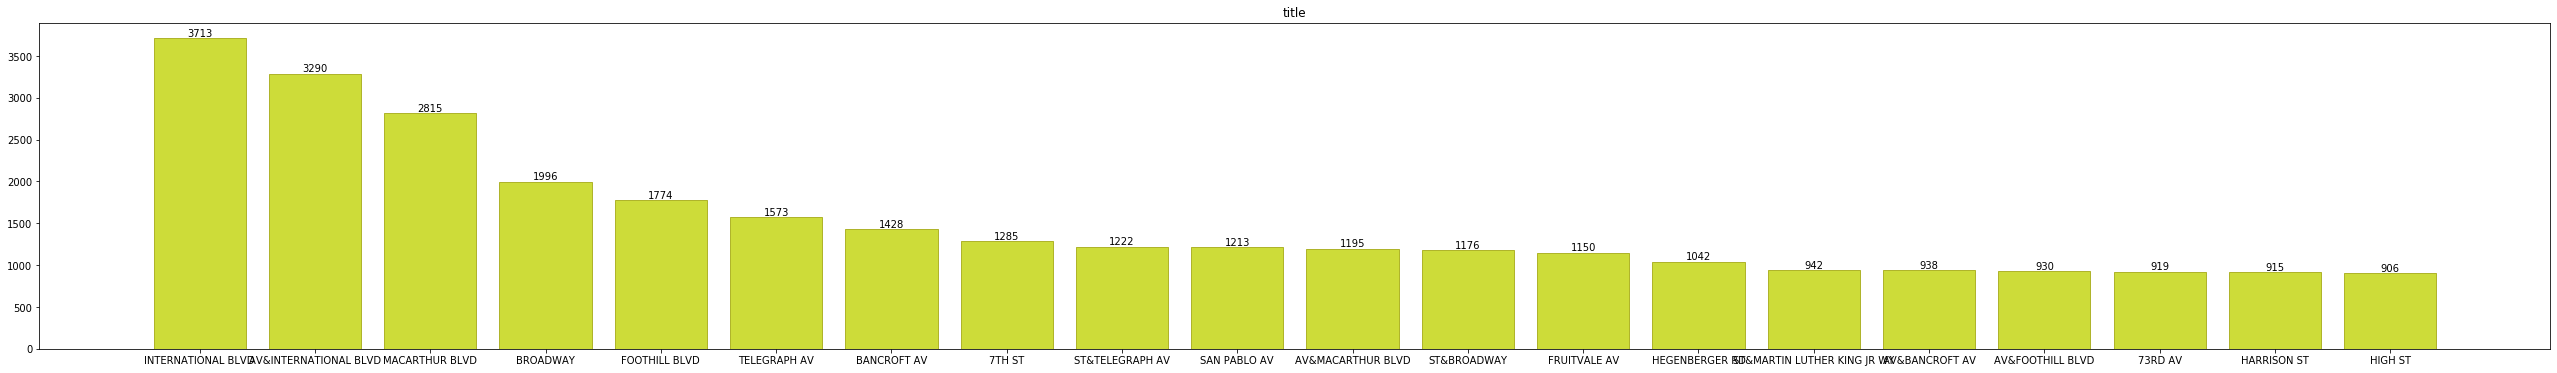

In [82]:
# 填充后的直方图 可以与上一小节的2014年的图对比
helper.hist_bar(3,45,6,'2014',20)

### 4 Priority优先级(无缺失值)

**频数统计**

In [83]:
helper.grab_col('Priority')

In [84]:
helper.count_none() #无缺失值

2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 0


[0, 0, 0, 0, 0, 0]

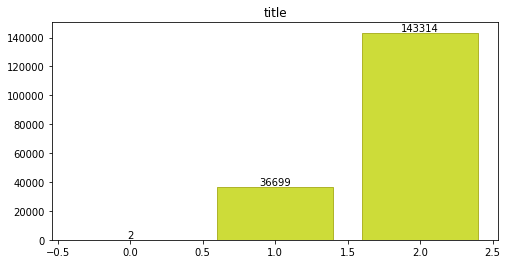

In [85]:
# 2011年
helper.hist_bar(0,8,4,'2011',3)

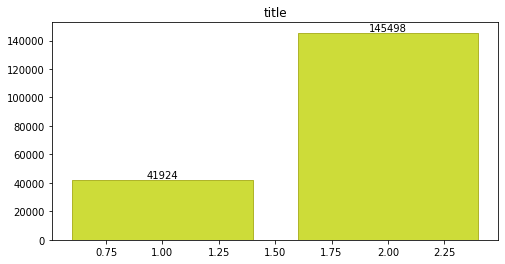

In [86]:
# 2012年
helper.hist_bar(1,8,4,'2012',3)

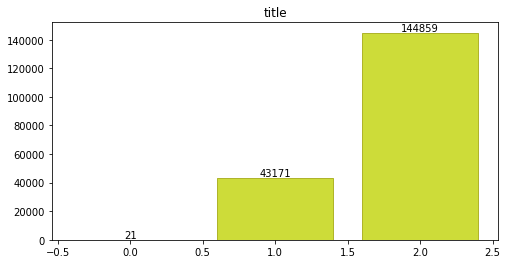

In [87]:
# 2013年
helper.hist_bar(2,8,4,'2012',3)

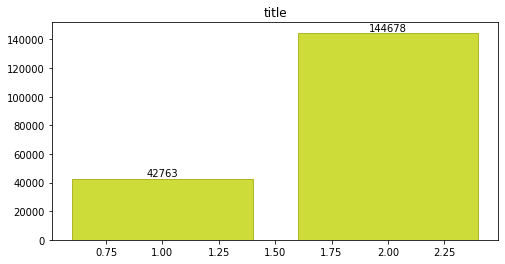

In [88]:
# 2014年
helper.hist_bar(3,8,4,'2012',3)

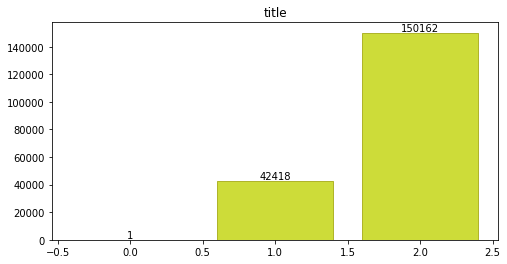

In [89]:
# 2015年
helper.hist_bar(4,8,4,'2012',3)

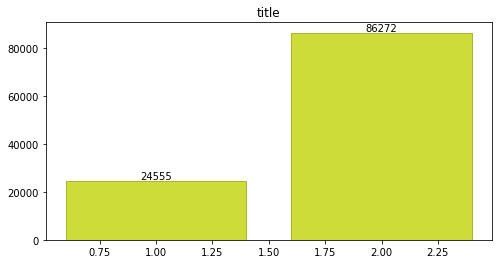

In [90]:
# 2016年
helper.hist_bar(5,8,4,'2012',3)

观察频数分布可以看出优先级为2的事件的发生频率总是比优先级为1的发生频率高，优先级为0的事件（空袭、立即需要警备人员）发生极少，在各个年份中几乎不发生，但在2013年发生了21起，可见OakLand在2013年比较动荡。

### 5 Incident Type Description案件类型描述(有缺失值)
该属性与Incident Id对应，故只分析Incident Type Description

In [91]:
helper.grab_col('Incident Type Description')

In [92]:
helper.count_none()

2011 : 0
2012 : 0
2013 : 4
2014 : 141
2015 : 243
2016 : 0


[0, 0, 4, 141, 243, 0]

**缺失值处理**
  
在列举所有年份的缺失值之后，发现所有案件类型描述的缺失项，对应的案件描述Id都是**JGP**，网上查询一圈后，并不知道该项的具体含义，所以还是利用属性的相关性，直接将此Id填入类型描述中比较合理

In [93]:
def fill_des(index):
    data = crime_helper.load_data(crime_helper.root,crime_helper.file_lst[index])
    index0 = data[data['Incident Type Description'] == ''].index
    for i in index0:
        data.loc[i,'Incident Type Description'] = 'JGP'
    data.to_csv(crime_helper.root + '/' + crime_helper.file_lst[index],index = False)

In [94]:
fill_des(2)

In [95]:
fill_des(3)

In [96]:
fill_des(4)

In [97]:
helper.grab_col('Incident Type Description')

In [98]:
helper.count_none()

2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 0


[0, 0, 0, 0, 0, 0]

**频数统计**

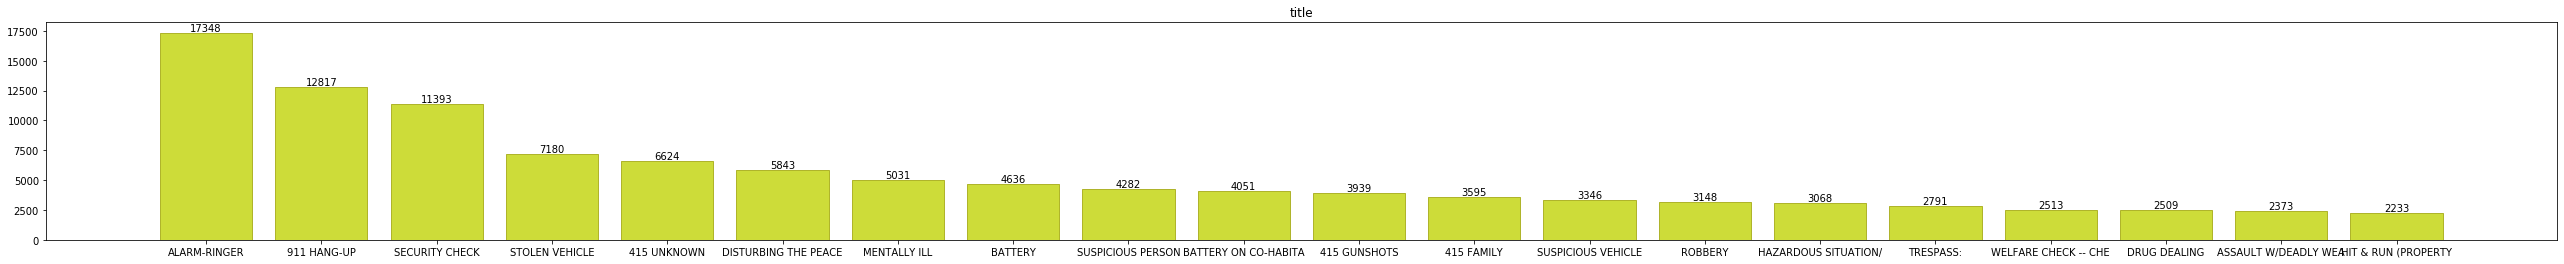

In [99]:
# 2011年
helper.hist_bar(0,45,4,'2011',20)

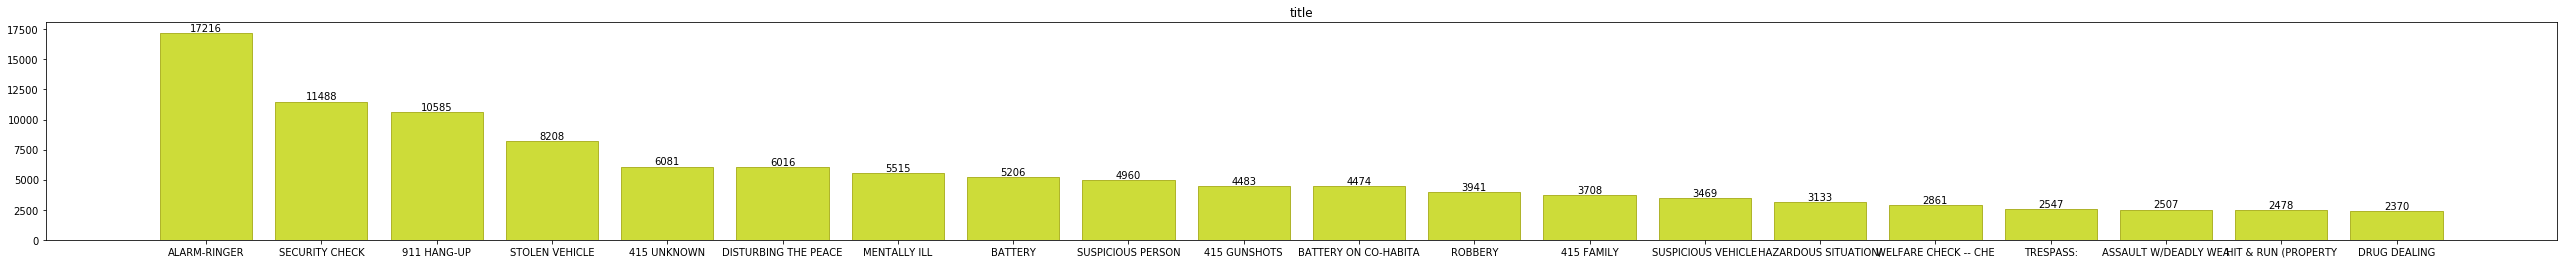

In [100]:
# 2012年
helper.hist_bar(1,45,4,'2012',20)

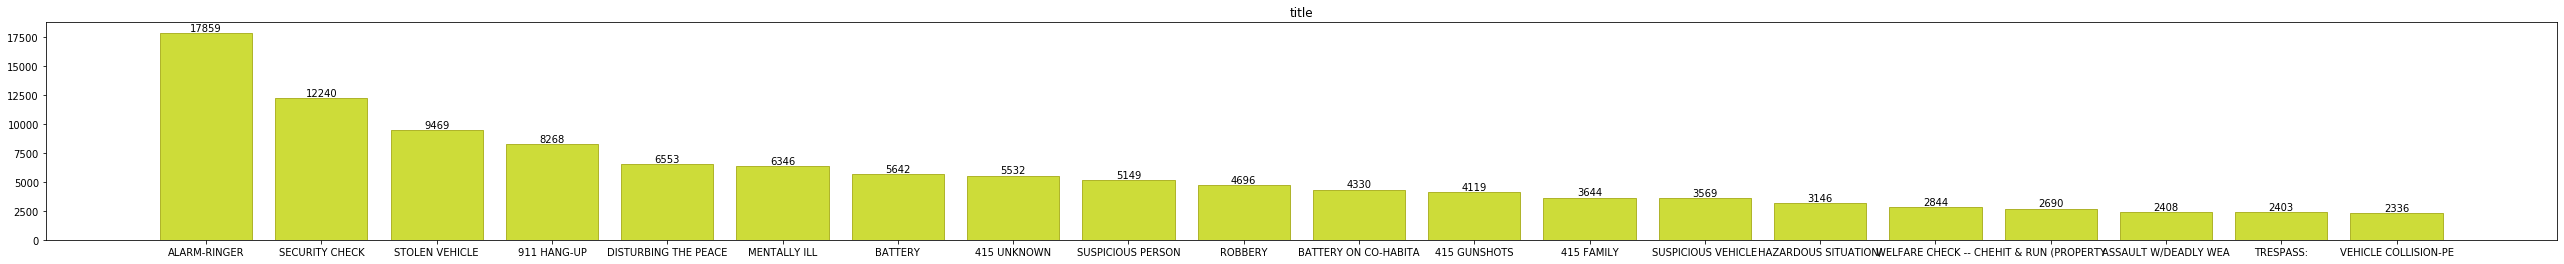

In [101]:
# 2013年
helper.hist_bar(2,45,4,'2013',20)

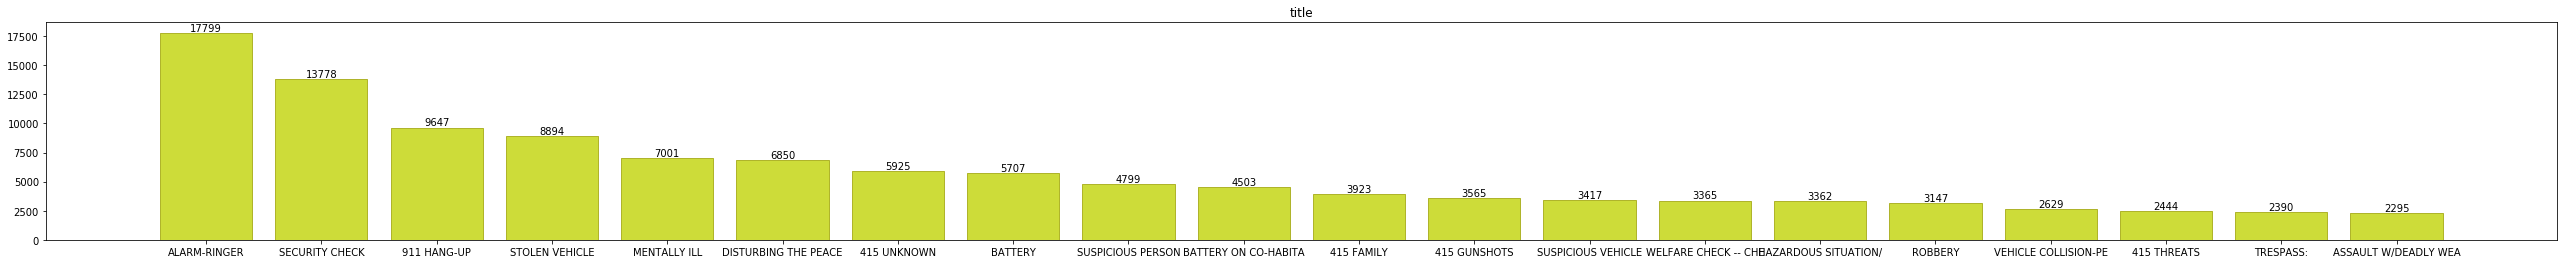

In [102]:
# 2014年
helper.hist_bar(3,45,4,'2014',20)

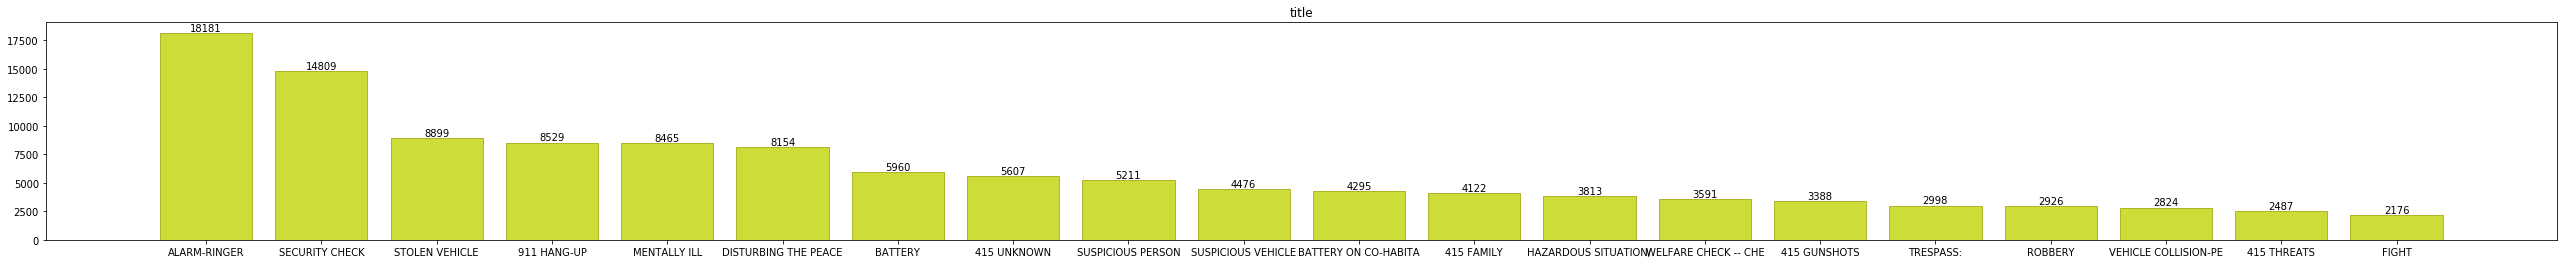

In [103]:
# 2015年
helper.hist_bar(4,45,4,'2015',20)

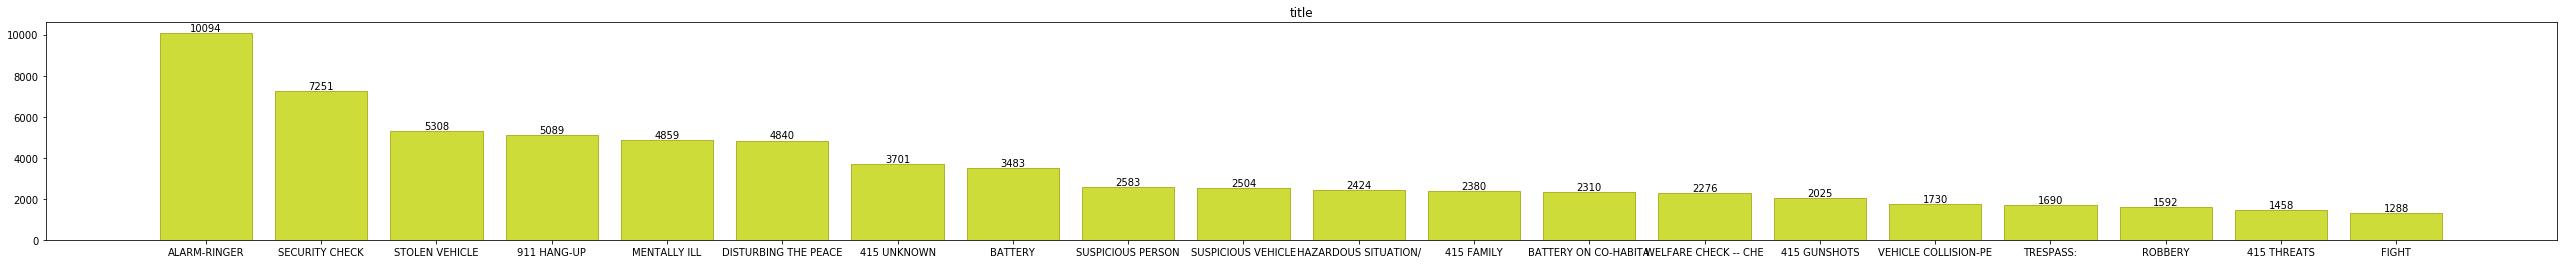

In [104]:
# 2016年
helper.hist_bar(5,45,4,'2016',20)

从各个年份的各种案件类型发生的频数来看(由于类型太多，直方图只列举了频率前20高的案件)，每年发生数量最多的案件大多数都是比较小的事件，如警报，安全检查，车辆被偷这类的案件。相比之下2016年的高频案件的各个类别都相比其他年份有减少趋势，应该是警方针对这些案件类型加强了管制。